# Numerical Methods I Interpolation and Curve Fitting

## Contents
## I.    Curve Fitting vs Interpolation
## II.   Interpolation 
###        II.   1      Mathematical Expression
###        II.   2      Simple Interpolation Example
## III.  Simple Least Squared Polynominal Curve Fitting
## IV.  Lagrange Polynominal
###        IV.  1      Explaination of Computational Expense
###        IV.  2      Mathematics of Lagrange Polynominal
###        IV.  3      Mathematics of Lagrange Polynominal but Simpler
###        IV.  EX   Short proof of Lagrange Polynominal
###        IV.  4      Lagrange and Scipy
###        IV.  5      Polynominal Error
## V.   Newton Polynominal
###        V.   1      Recursive Form and Divided Difference Notation
###        V.   2      Code Implementation of V.   1
## VI.  Extrapolation

# -----------------------------------------------------------------------------------------------------------------

<p> Real world environment always generate data, and an important part of a scientist's job is to find patterns in these observations. Python provides several libraries which help make predictions based on real world data. This course will be primarily focused on the libraries numpy, scipy and matplotlib. While Python can make prediction based on existing data point, the human eye is still probably currently the best judge on whether those predictions are sensible or not. To start this course off, let's import numpy, scipy and matplotlib.</p>



In [16]:
import numpy
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

<p>Note that the above cell needs to be run when you begin a notebook. These libraries need to be imported before the modules in the libraries could be used. If you ever encounter an error message saying Nameerror, name {libary_name} is not defined, then please run the cell above again, so that the libraries specified above are properly imported. </p>

<p> Let's consider a discrete set of data, and let's start with a dataset with 2 dimensions. </p>
<p> For example, we could consider the global temperature change over the years. On the x-axis, we could plot the year and on the y-axis, we could plot the temperature. Every year will have a corresponding temperature. </p>
<p>  We start counting from 0 because Python index starts from 0. The 1st data point will be data point 0, the 2nd data point will be data point 1, and the 3rd data point will be data point 2, etc. and the last datapoint will be called datapoint $N$. In total, we will have $N+1$ data points, since we start counting from 0.  For every data point, there will be an year and a temperature, so there will be an $x$ value and there will be a $y$ value for every data point. </p>
<p> Since there is a $x$ value and a $y$ value for every data point, we could call the $x$ value of the 1st data point, or data point 0, to be $x_0$, and the y value of the 1st data point, or data point 0, to be $y_0$.We could call the $x$ value of the 2nd data point, or data point 1, to be $x_1$, and the y value of the 2nd data point, or data point 1, to be $y_1$, so on and so forth. We will call the $x$ value of the last data point, or data point $N$, to be $x_N$, and the y value of the last data point, or data point $N$, to be $y_N$.</p>
<p>Therefore, our two dimensional dataset can be described as</p>
<p></p>
$$ Dataset = \{ (x_0, y_0),(x_1, y_1),(x_2, y_2),(x_3, y_3), \ldots, (x_N,y_N) \}$$
<p></p>
<p> We could define an index $i$, which goes from $0$ to $N$, and describe our dataset as a set of datapoints with their respective $x$ and $y$, which have their index going from $0$ to $N$. Expressed mathematically: </p>
<p></p>
$$ Dataset = (x_i, y_i),\;\;\;\;\;\; where \;\;\;\;\;\; i=0,\ldots,N,$$
<p></p>
<p> Or even simpler</p>
<p></p>
$$ (x_i, y_i),\;\;\;\;\;\; i=0,\ldots,N,$$

# I. Curve Fitting vs Interpolation

<p>The terms curve fitting and interpolation are often used interchageably, but they are actually very different. In both interpolation and curve fitting, we assume there is some kind of function or relationship between the $x$ value and the $y$ value (and maybe even $z$ if the dataset is 3 dimensional, and even more if the dataset has even more dimensions i.e. Machine Learning and Artificial Intelligence) and we seeks to find, from the limited datapoints that are available, the best approximate of this function or relationship. </p>
<p>In our temperature example where we plotted temperature against year, we seek to answer the question if there is a relationship between the temperature and the year. Has the temperature increased through the years, or has the temperature decreased through the year, or maybe the temperature is unrelated to the year? Maybe our data server went up in flames (this apparently happens way more often than you think, that's why invest in a proper RAID configuration) and we lost the temperature data for some of the years, could we maybe use the relationship we deduced from the rest of the data points to give an estimate of what the temperature for those years without data to be?</p>
<p>In both curve fitting and interpolation, you begin with some discrete data points.</p>
<p>With interpolation, you seek a function that typically goes through all of the datapoints, regardless of what the function will end up looking like. Interpolation is typically used when there is great confidence that there are no measurement errors in the data points, and there is no ambiguity in mapping $x$ to $y$, meaning that there are no multiple values of $y$ for a single $x$, similar to how mathematical functions are defined. </p>
<p>With curve fitting, you simply seek some function that will be a best fit for all the datapoints, and does not neccesarily have to go through all the datapoints. Curve fitting is typically used when there are significant error bars in the data points, and there is ambiguity in mapping $x$ to $y$. </p>
<p>Although it may seem that interpolation is better than curve fitting, since it goes through all the data points, it should be noted that real world data almost always contains some sort of measurement error. Because interpolation tries to fit all the data points, the function produced through interpolation can vary widly even with the slightest change in the data point. Because curve fitting does not seek to fit all the data points, curve fitting functions are less susceptible to drastic changes when there are changes in the data points. </p>

<p>Interpolation has the inter word prefix to it, because using the function you got from interpolation, you can make prediction about the $y$ value within the range of the given data points. For example, if I had the temperature data every 5 years since 1990, so I have temperature data for the years 1990, 1995, 2000, 2005, 2010, 2015 and 2020 then interpolation would allow me to make prediction about the temperature data in other years within the range of the data points, so from 1990 to 2020, meaning the years 1991, 1992, 1993, 1994, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2016, 2017, 2018, 2019. Extrapolation is for what is outside the range of your data points. For example, if I had the temperature data every 5 years since 1990, extrapolation would mean trying to predict the temperature in 2200 or 1600, which is outside the range of the given data points. Extrapolation needs to be done with extreme caution and should generally be avoided. It should be obvious why using temperature data for every 5 years since 1990 to predict how temperature was back in 1600 or will be in 2200 is a bad idea.  </p> 



<p> Both interpolation and curve fitting can be done in various different ways. This notebook will introduce some of these ways in which interpolation and curve fitting are done. </p>

# II. Interpolation 

## II.1 Mathematical Expression

<p>As stated previously, interpolation seeks to find a function that maps $x$ value in the datapoints to the $y$ value in the corresponding datapoints. Therefore, interpolation can be expressed as :</p>
<p></p>
$$y_i = f(x_i),\;\;\;\;\;\; \forall i, \;\;\;\;\;\text{[$\forall \equiv$ "for all"]}$$
<p></p>
where the function $f$ is called the interpolant (http://mathworld.wolfram.com/Interpolant.html)
<p>Because it is called interpolation, we can only make predictions for values of $x$ within the range of $x_i$.</p>

$$ min(x_i)<x<max(x_i) $$

The requirement for distinct $x$ locations means that we have a constraint on the $x_i$'s which can be written as

$$x_0 < x_1 < \ldots < x_N,$$ 

## II.2 Simple Interpolation Example

<p>It is assumed here that you have had some basic understanding and experience with numpy, scipy and matplotlib libraries.<p>

<p>The simplest form of interpolation is linear interpolation, which is basically joining all the data points together in a line, and then creating a piecewise function</p>
<p> Suppose we have a set of arbitrary data: </p>

$$Dataset = \{ (0.5, 0.5), (2.0, 0.4), (4.0, 0.3), (5.0, 0.1), (7.0, 0.9), (9.0, 0.8) \}$$

<p>The $x$ values of the dataset are </p>
$$Dataset\;x-values = \{ 0.5, 2.0, 4.0, 5.0, 7.0, 9.0 \}$$

<p>The $y$ values of the dataset are </p>
$$Dataset\;y-values = \{ 0.5, 0.4, 0.3, 0.1, 0.9, 0.8 \}$$

<p>For linear piecewise interpolation, we begin with the first 2 points in the dataset, and then the next 2 point, and the next 2 points and so on and so forth. For the first 2 points, we find a linear equation that is determined by these two points. Linear equations are expressed as:</p>

$$y = mx + c $$

<p> $m$ is the gradient, $c$ is the y - intercept, and $m$ and $c$ can be found by</p>

$$m = \frac{y_2 - y_1}{x_2 - x_1}$$

$$c = y_1 - mx_1 \;or\; c = y_2 - mx_2 $$

<p> For the first 2 points $(0.5, 0.5)$ and $(2.0, 0.4)$  we obtain</p>

<p> For the first 2 points of the dataset, $m = \frac{-1}{15}$ and $c =\frac{8}{15} $
    
<p> So for the range $0.5<x<2.0$, the function can be written as</p>

$$f(x) = \frac{-1}{15}x + \frac{8}{15} , 0.5<x<2.0$$

<p> For the next 2 points $(2.0, 0.4)$ and $(4.0, 0.3)$ we do the same, and we obtain</p>

<p> For the next 2 points of the dataset, $m = \frac{-1}{20}$ and $c =\frac{1}{2} $
    
<p> So for the range $2.0<x<4.0$, the function can be written as</p>

$$f(x) = \frac{-1}{20}x + \frac{1}{2} , 2.0<x<4.0$$

<p> we can combine the two partial functions above, and obtain </p>

$$
  f(x) = \left\{\begin{array} \\
    \frac{-1}{15}x + \frac{8}{15} , 0.5<x<2.0 \\
    \frac{-1}{20}x + \frac{1}{2} , 2.0<x<4.0
  \end{array}\right\}
$$

<p> We can continue the above process for the next 2 points, and the next 2 points, and eventually we will get a piecewise linear function</p>

$$
  f(x) = \left\{\begin{array} \\
    \frac{-1}{15}x + \frac{8}{15} , 0.5<x<2.0 \\
    \frac{-1}{20}x + \frac{1}{2} , 2.0<x<4.0 \\
    ...
  \end{array}\right\}
$$

In [15]:
## Linear Equation Solver
## I got angry at all the ads when I was trying to find a solver for linear equations 

x1 = float(input("x1 is equal to "))
y1 = float(input("y1 is equal to "))
x2 = float(input("x2 is equal to "))
y2 = float(input("y2 is equal to "))


m = (y2-y1)/(x2-x1)
print("m is equal to ", (y2-y1)/(x2-x1))
c1 = (y1 - m*x1)
c2 = (y2 - m*x2)
if c1 == c2:
    print("c found from 1st point and c found from 2nd point are the same")
    print(c1)
else:
    print("wut?")



KeyboardInterrupt: Interrupted by user

<p> Piecewise linear interpolation can be easily done in Python </p>
<p> First, let's begin with plotting the points on their own</p>
<p> I will create 2 numpy arrays to store the arbitray data from above, and use matplotlib to plot. </p>
<p> The code below is most simplest essential code for plotting it out</p>
<p> Python will automatically join the points together with lines unless otherwise specified, so the "ko" was used in the plt.plot to ensure that bullets were shown instead of lines.</p>

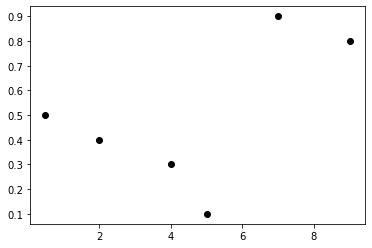

In [21]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

xi = numpy.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = numpy.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

plt.plot(xi,yi, "ko")
plt.show()

<p>The plot above looks rather barebone, and maybe we should add some labels to it, since your lecturers and professors will always tell you to add labels. Once you become a scientific researcher, you will understand the frustration when you find an excellent paper but have no idea what the graphs mean because it is not or just minimally labelled.</p>
<p>Let's start with adding a title, an axis, and a legend for the plot. Remember, adding title, xlabel, ylabel, and legend always comes after the plot has actually been made! Oh, and let's not forget a 0.1 margin :)</p>

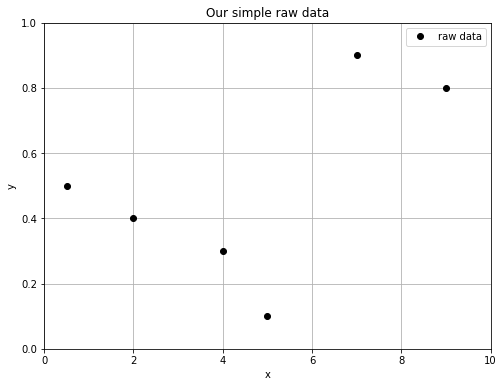

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Note that this time, numpy is written as np, and matplotlib.pyplot as plt
#The main reason is that I have smaller chance of making spelling when calling the libraries and modules

xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

plt.figure(figsize=(8,6))
plt.plot(xi,yi, "ko", label = "raw data")
plt.title("Our simple raw data")
plt.margins(0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.xlim(0,10)
plt.ylim(0,1)
plt.legend(loc = "best")
plt.show()

<p> As your Python needs become more sophisticated, you may need to have mutliple things plotted. If so, it is better to organize your plots into subplots. The code below has been provided as an example</p>

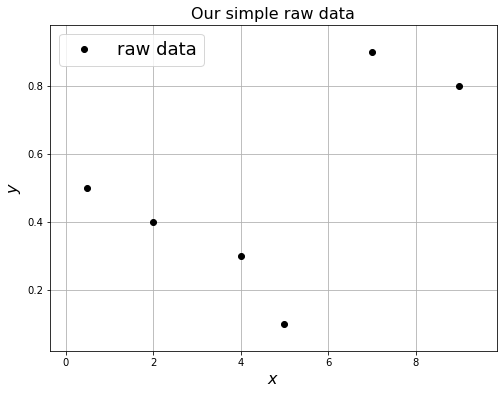

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

#Here, we are setting up the figure
fig = plt.figure(figsize=(8, 6))   
# This means that the variable fig is used to represent plt.figure
# This also specifies the size of the figure to 8 and 6
ax1 = fig.add_subplot(111)
# Our plot is made into one of the subplot of the figure

def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)

#This function will take in the raw data, and the ax, which refers to the subplot.
#First, the data is plotted. 
#"ko" means it is plotted in points and label gives a label for this dataset to be used in the legend
#"ax.set_xlabel" gives the figure a label for the x axis, fontsize = 16 means the font size is 16
#"ax.set_ylabel" gives the figure a label for the y axis, fontsize = 16 means the font size is 16
#"ax.grid(True)", default is ax.grid(False), change False to True if want grid to appear on figure

# For clarity we are going to add a small margin to all the plots.
ax1.margins(0.1)

# plot the raw data
plot_raw_data(xi, yi, ax1)

# add a figure title
ax1.set_title('Our simple raw data', fontsize=16)

# Add a legend
ax1.legend(loc="best", fontsize=18);


<p> Now, let's plot the piecewise linear function </p>
<p style="color:red;"> We will use the function from above, so be sure to run the cell above so that the function is loaded!!!</p>

<p> We will first creat the figure with size 8 and 6, and then add ax1 as a subplot to our figure</p>
<p></p>We will also set margins as 0.1</p>

<p>As stated before, the default Python behaviour is to join the dots with lines. </p>

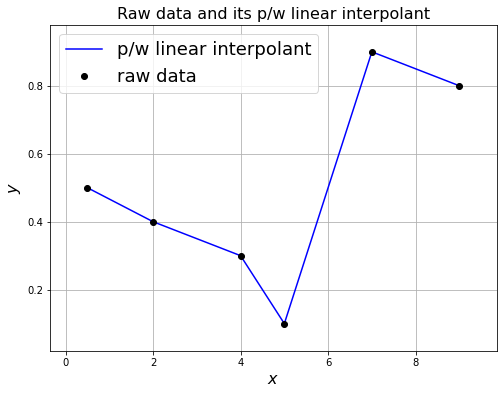

In [36]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot a piecewise-linear approximation.
# We get this simply by connecting the points with straight lines
# and this is the default behaviour of the plotting routine so simply
# involves a call to 'plot' with our data.
ax1.plot(xi, yi, 'b', label='p/w linear interpolant')

# The previous raw data is overlaid using the previous function
plot_raw_data(xi, yi, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=18)

# Add a figure title
ax1.set_title('Raw data and its p/w linear interpolant', fontsize=16);

# III. Simple  Least Sqaure Polynominal Curve Fitting

<p>Imagine having several points on a graph, and you want a curve that could go through all these points. The curve could be described through a mathematical function that could create a curve. Remember that straight lines could be considered a special case of a curve where the line is straight, much like how in topology, the square is a special case of a rectangle, and a rectangle is a special case of a parallelogram, and parallelogram a special case of a quadrilateral. One of the mathematical function that could create curves is a polynominal function. </p>
<p> A first degree polynominal function is basically a straight line, and is written in the form of:</p>
$$ y = mx + c $$
<p> A second degree polynominal function is basically a curve with a single bend, and is written in the form of:</p>
$$ y = ax^2 + bx + c$$
<p> A 3 degree polynominal function is a curve with two bends, and is written in the form of:</p>
$$ y = ax^3 + bx^2 + cx + d $$
<p> Thus, a polynominal function of $n$ degree is a curve with $n-1$ bends</p>

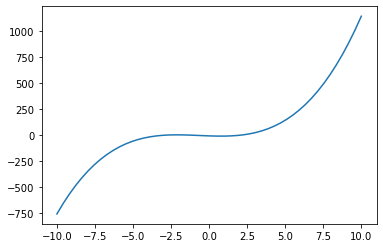

Cubic polynominals have 2 bends


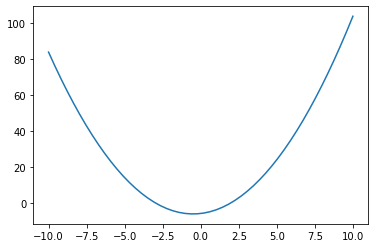

Quadratic polynominals have 1 bend


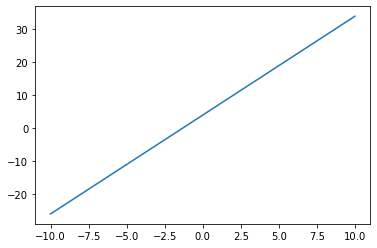

Straight Line have 0 bend


In [41]:
##A snippet to showing polynominal degree and number of bends

import numpy as np
import matplotlib.pyplot as plt

def poly_plot(xmin, xmax, number_of_points, a, b, c, d):
    xi = np.linspace(xmin, xmax)
    yi = a*xi**3 + b*xi**2 + c*xi + d
    plt.plot(xi, yi)
    plt.show()
    
poly_plot(-10, 10, 100, 1, 2, -5, -6)
print("Cubic polynominals have 2 bends")
poly_plot(-10, 10, 100, 0, 1, 1, -6)
print("Quadratic polynominals have 1 bend")
poly_plot(-10, 10, 100, 0, 0, 3, 4)
print("Straight Line have 0 bend")


<p> A curve that goes through multiple points will have to bend and twist itself so that it goes through these points. Therefore, a curve with a higher polynominal degree, and thus a larger number of bends, will be able to bend and twist itself to better fit the points. </p>
<p>Numpy's polyfit modules provides such a functionality. By given the degree of the polynominal and the data points you wish to fit the polynominal function to, the module will generate a polynominal function that it believes is the best fit to the data points.</p>

These are the coefficients of the polynominal [ 0.02013603 -0.13983999  0.55279339]


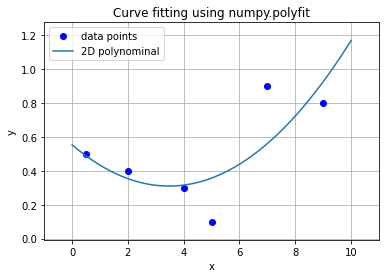

This is the polynominal equation
         2
0.02014 x - 0.1398 x + 0.5528
These are some results of substituing the number in p1() into x for the 2D polynominal
This is the result of substituing 0.05 into p1  0.5458517293141258
This is the result of substituing 2.15 into p1  0.3452162121592002
This is the result of substituing 7.85 into p1  0.69588202381182
These are 100 evenly spaced numbers between 0 and 10
[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4

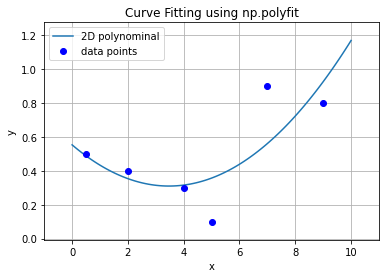

In [70]:
##I wrote lots of words here, you may have to scroll down to see the full result of executing this cell

import numpy as np
import matplotlib.pyplot as plt

##First, we specify the input datapoints through 2 numpy arrays
##We also have to specify the degree of the polynominal function
##If degree is 1, then it would try to fit a straight line
##If degree is 2, then it would try to fit a curve line with one bend
## Thus, it is useful to visually inspect the data before to determine how many bends it needs
## Let's say we do a degree 2 polynominal

xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])
degree = 2

##Second, we generate the coefficients of the polynominal function
##For a straight line, the coefficients are a and b
##For a single bend curve, the coefficients are a, b and c
##For a 2 bend curve, the coefficients are a, b, c and d
##So on and so forth
##We will use np.polyfit to generate the coefficients
##Numpy polyfit work for 2D, and takes in two arrays and the degree of the polynonimal you want to fit

poly_coeffs = np.polyfit(xi,yi, degree)

print("These are the coefficients of the polynominal", poly_coeffs)

##Then, we need to turn this polynominal into a function
##An example is given of how this polynominal can be turned into a polynominal function
##However, you could simply use the np.poly1d to do this instead
def func1(x):
    y = 0
    for i in range(len(poly_coeffs)):
        y = y + poly_coeffs[i] * x ** (len(poly_coeffs) - 1 - i)
    return y

x = np.linspace(0, 10, 1000)
plt.plot(xi, yi, "bo", label = "data points")
plt.plot(x, func1(x), label = "2D polynominal")
plt.legend(loc="best")
plt.title("Curve fitting using numpy.polyfit")
plt.grid(True)
plt.margins(0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.close()  ##It is always a good habit to close plt once you finished plotting a graph

##Instead of the above, use np.poly1d
##np.poly1d takes the coefficients. Here the coefficients are in poly_coeffs
##So my code will be np.poly1d(poly_coeffs)
##We will name our function p1 
p1 = np.poly1d(poly_coeffs)
print("This is the polynominal equation")
print(p1)
##As you can see p1 has x inside. 
##p1 will take the x value that you give it, and for every x value given, will output a result
##Result is found by substituting x into the the p1
##For example
print("These are some results of substituing the number in p1() into x for the 2D polynominal")
print("This is the result of substituing 0.05 into p1 ", p1(0.05))
print("This is the result of substituing 2.15 into p1 ", p1(2.15))
print("This is the result of substituing 7.85 into p1 ", p1(7.85))

##To make a graph out from the function p1 that we found
##We need to draw a line using matplotlib
##The functions from np.poly1d can also take in arrays
##If the functions took in an array with n numbers, then it will output an array
##Output array will have the result of substituing the n numbers into the function, in order
##Therefore, to make a graph, we can make the function take in a sufficiently large, evenly spaced array
##between the ranges we want it to display. 
##We can use numpy.linspace to create our sufficiently large, evenly space array
##Remind: np.linspace(start of range, end of range, number of evenly space elements in the array)

x = np.linspace(0, 10, 100)
print("These are 100 evenly spaced numbers between 0 and 10")
print(x)
print("Substituting these number in our function, we obtain other 100 numbers as a result of substituion")
print(p1(x))

##These two arrays will be used to plot the polynominal
##Since a large number of points will look like a line
##We will also plot the data points too, to see how good does our 2D polynominal fit
plt.plot(x, p1(x), label = "2D polynominal")
plt.plot(xi, yi, "bo", label = "data points")
plt.title("Curve Fitting using np.polyfit")
plt.legend(loc = "best")
plt.grid(True)
plt.margins(0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.close() ##It is always a good habit to close plt once you finished plotting a graph


<p> Let's check what happens if the number of degrees increases for our polynominal increases</p>

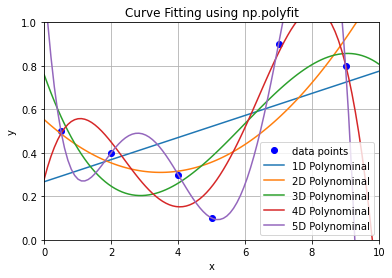

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

plt.plot(xi,yi, "bo", label = "data points")

degrees = list(range(1, 6))
## Python will complain polyfit may be poorly conditioned if the number of degrees here is too high!
for i in range(len(degrees)):
    poly_coeffs = np.polyfit(xi, yi, degrees[i])
    p1 = np.poly1d(poly_coeffs)
    x = np.linspace(0, 10, 100)
    plt.plot(x, p1(x), label = str(degrees[i]) + "D Polynominal")

plt.title("Curve Fitting using np.polyfit")
plt.legend(loc = "best")
plt.grid(True)
plt.margins(0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.show()
plt.close() ##It is always a good habit to close plt once you finished plotting a graph

<p> As shown above, increasing the number of degrees makes the curve fit the data points better.</p>

# IV. Lagrange Polynominal 

<p> While the least square polynominal works quite well, it is rather computationally expensive. While useful in solving small scale problems, real world data is often very complicated, and we should try to seek better methods to save computational power </p>

## IV.1 Explaination of Computational Expense

Assume we have two pieces of information and want to fit a linear line - let's write these out:

\begin{align*}
(1) & \;\;\;\; y_0 = a_0 + a_1\,x_0, \\[5pt]
(2) & \;\;\;\; y_1 = a_0 + a_1\,x_1. 
\end{align*}

We are assuming we know the $x$'s and the $y$'s, and we want to find the $a$'s.

There are multiple ways we could solve this, one way is to think about how you solve simultaneous equations - e.g. rearrange the second equation to give an expression for $a_1$ in terms of $a_0$, and so on, .... [we'll return to these ideas in a later lecture].

However this isn't easy to do with large amounts of data.

Instead we can note that this is equivalent to forming and solving the linear system

$$
\begin{pmatrix}
1 & x_0  \\
1 & x_1 
\end{pmatrix}
\begin{pmatrix}
a_0\\
a_1
\end{pmatrix}
=
\begin{pmatrix}
y_0\\
y_1
\end{pmatrix}.
$$



Note that we can also interpret this as a *linear combination* of a <a href="https://en.wikipedia.org/wiki/Basis_(linear_algebra)">*basis*</a> made up of single-term polynomials: 

$$1, \; x, \; x^2, \; \ldots, \; x^N.$$ 

These single term polynomials are also referred to as [*monomials*](https://en.wikipedia.org/wiki/Monomial). 

Our linear example from earlier is an example of this with two free parameters.

We will come back to monomials, as well as other (NB. a basis is not unique) potential functions/polynomials to use as basis functions later -  we will see below that other basis options can be more convenient when actually implementing interpolation.


#### Can we do better?

While this is perhaps the simplest (it's consistent with the simplest definition of a polynomial we are used to seeing) and the most obvious way to proceed, we should ask ourselves can we do better? 

i.e. can we try to use a different (less obvious) basis that might mean we don't have a (potentially large, and difficult) matrix system to solve for the coefficients?

## IV.2 Mathematics of Lagrange Polynominal

The answer is yes, and [Lagrange polynomials](http://mathworld.wolfram.com/LagrangeInterpolatingPolynomial.html) are a particularly popular choice for constructing an interpolant for a given data set. 

Given a set of $(N+1)$ points as above, the Lagrange polynomial is defined as the linear combination

$$L(x) := \sum_{i=0}^{N} y_i \ell_i(x),$$

where the $\ell_i(x)$ are a new choice for our basis functions (different to the monomials, but the same idea in that they form a <a href="https://en.wikipedia.org/wiki/Basis_(linear_algebra)">*basis*</a>), and the $y_i$ are the $N+1$ weights/coefficients corresponding to this basis.

Note that this is not a typo and we are not re-using notation here - we will see that **the weights in this approach actually ARE the same as the $y_i$'s making up the data we are interpolating!**

This is the whole point of this approach - we no longer have to compute the weights by inverting a matrix system as we had to above with monomials. 

Now, by construction in this approach, we know the weights directly from the given data.

The functions $\ell_i(x)$ are known as the *Lagrange basis polynomials* and are defined by the product

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_N)}{(x_i-x_N)},$$

where $0\le i\le N$.

If $N=0$ (*i.e.* if there is only one point in the data set), there is only one Lagrange basis polynomial defined by convention as $\ell_0=1$.

Notice from the definition of these basis functions the clear requirement that no two $x_i$ are the same, $x_i - x_m \neq 0$, so this expression is always well-defined (i.e. we never get a divide by zero!). 

The reason pairs $x_i = x_j$ with $y_i\neq y_j$ are not allowed is that no interpolation function $L$ such that $y_i = L(x_i)$ would exist; a **function** can only return a single unique value for each argument $x_i$ (this uniqueness is part of the definition of a <a href="https://en.wikipedia.org/wiki/Function_(mathematics)">*function*</a>).

On the other hand, if also $y_i = y_j$, then those two points would actually be one single point - we would thus have redundant data and really we could throw one away and would be looking for a degree $N-1$ degree to interpolate $N$ **distinct** data points.

For all $j\neq i$, $\ell_j(x)$ includes the term $(x-x_i)$ in the numerator (the thing on the top), so the whole product will be zero when evaluated at $x=x_i$:

$$\ell_{j\ne i}(x_i) =
\prod_{\begin{smallmatrix}0\le m\le N\\ m\neq j\end{smallmatrix}}
 \frac{x_i-x_m}{x_j-x_m} = \frac{(x_i-x_0)}{(x_j-x_0)} \cdots \frac{(x_i-x_i)}{(x_j-x_i)} \cdots \frac{(x_i-x_N)}{(x_j-x_N)} = 0.$$

On the other hand a basis function $i$ evaluated at location $x_i$ returns 1:

$$\ell_i(x_i) = 
\prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}}
\frac{x_i-x_m}{x_i-x_m} = 1.$$

In other words, all of the basis functions/polynomials are zero at the exact locations of the data ($x=x_i$), except for $\ell_i(x)$, for which it holds that $\ell_i(x_i)=1$, because it lacks the $(x-x_i)$ term in the product.

It follows that 

$$y_i \ell_i(x_i)=y_i,$$ 

and therefore at each point $x_i$

$$L(x_i)=0+0+\dots + y_i + 0 +\ldots +0=y_i,$$ 

showing that $L$ does indeed interpolate (i.e. pass through) the data points exactly.



## IV.3 Mathematics of Lagrange Polynominal but Simpler

Ok, so all the above was taken from previous year lecture notes, and sound really complicated.

I will be trying to give a short explaination of what is said above, that will be skipping a lot details and rigorous math magic.  

There are several ways to write your polynominal. You have the most usual way to write a polynominal, which is basically writing it as

$$ Polynominal = \Sigma^n_{k=0} a_k x^k $$

For degree 2 polynominal, this would look like

$$ Polynominal = ax^2 +bx + c $$

For degree 3 polynominal, this would look like

$$ Polynominal = ax^3 +bx^2 + cx + d $$

For degree 4 polynominal, this would look like

$$ Polynominal = ax^4 +bx^3 + cx^2 + dx + e $$

However, there are also other ways of writing a polynominal.

Moreover, you can add, subtract, multiply polynominals, or divide polynominals by constants(not polynominals) and they will still end up as polynominals.
Therefore, if you only have the 3 operations above, and only polynominals to play with, and only division by constant then your end result will always be a polynominal. 

Note that if you work a polynominal function using something other than the 3 operations above, or use something other than a polynominal function, such as a trigonometric function, their end result may not be a polynominal! Because Lagrange Polynominal has the word Polynominal to it, if Lagrange Polynominal is used for interpolating something which is not a Polynominal, there could be serious errors. This could be extended to any other form of Polynominal, like the Newton Polynominal too. Basically, trying to use a polynominal function to describe something which is actually not polynominal, like trigonometric or logarithmic, can result in serious errors. 

You can think of the Lagrange Polynominal as another form of writing the polynominal. As stated before, although Lagrange Polynominal looks more complicated, it is actually less computationally expensive if you are trying to fit a lot of points using Lagrange Polynominal. You can say that the Lagrange Polynominal is a form of writing the standard polynominal in such a way that makes the computer easier to do interpolation, when there are a lot of data points involved.


Since Lagrange polynominal is useful for interpolating, then to arrive at our Lagrange Polynominal, we always begin from our data points. Our data point can be written as below, where $(x_0,y_0)$ is used to represent a data point at the beginning,$(x_i,y_i)$ is used to represent a data point in the middle, $(x_N,y_N)$ is used to represent a data point at the end. 

$$(x_0,y_0), \ldots (x_i,y_i), \ldots(x_N,y_N)$$

From these points, we build out the Lagrange Basis Polynominal for each and every one of the data points, using the formula below. We can represent an arbitray data point as $(x_i,y_i)$ and the Lagrange Basis Polynominal for that point to be $\ell_i(x)$



$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_N)}{(x_i-x_N)},$$

$\prod$ is similar to $\Sigma$, just instead of adding, it's multiplying

$0\le m\le N$ and $m\neq i$ means that $m$ goes from 0 to N, but skips over $i$

Since $m$ goes from $0$ to $N$, but skips $i$, then the first terms in the product will be, beginning with $m$ at $0$:

$$m = 0$$

$$\frac{x-x_m}{x_i-x_m}$$

$$\frac{x-x_0}{x_i-x_0}$$

Your Langrange Basis Polynominal becomes

$$\ell_i(x) := (\frac{x-x_0}{x_i-x_0}) \ldots$$

Since $m$ iterates goes from $0$ to $N$, but skips $i$, then the second term in the product will be, continuing with $m$ going to $1$:

$$m = 1$$

$$\frac{x-x_m}{x_i-x_m}$$

$$\frac{x-x_1}{x_i-x_1}$$

Your Langrange Basis Polynominal becomes

$$\ell_i(x) := (\frac{x-x_0}{x_i-x_0})(\frac{x-x_1}{x_i-x_1}) \ldots$$

Since $m$ iterates goes from $0$ to $N$, but skips $i$, then the third term in the product will be, continuing with $m$ going to $2$:

$$m = 2$$

$$\frac{x-x_m}{x_i-x_m}$$

$$\frac{x-x_2}{x_i-x_2}$$

Your Langrange Basis Polynominal becomes

$$\ell_i(x) := (\frac{x-x_0}{x_i-x_0})(\frac{x-x_1}{x_i-x_1})(\frac{x-x_2}{x_i-x_2}) \ldots$$

So on and so forth, <span style="color:red;"> Note that here we assumed that $i\neq0, 1 or 2$. If $i = 0, 1 or 2$, we have to skip it, since the condition is that $m\neq i$ </style>

Remember that $m$ skips over $i$, there will be no 

$$\frac{x-x_i}{x_i-x_i}$$

Because this would cause division by zero

$$\frac{x-x_i}{x_i-x_i} = \frac{x-x_i}{0}$$

Once you multiply every

$$\frac{x-x_m}{x_i-x_m}$$ 

you got from substituting $m$ from $m = 0$ to $m = N$, and skipping $m = i$ in the middle to avoid division by zero, you have obtained Lagrange Basis Polynominal for the data point, shown below. 

Notice how to show that $m$ skips over $i$ the middle part is shown where there is $i-1$ and $i+1$ but no $i$.  

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_N)}{(x_i-x_N)},$$


Now, from your Lagarange Basis Polynominal, you can build your Lagrange Polynominal. The Lagrange Basis Polynominal is called a basis here because it serves as a building block for the Lagrange Polynominal

Your Lagrange Polynominal looks like 

$$L(x) := \sum_{i=0}^{N} y_i \ell_i(x),$$

$L(x)$ has $L$ which stands for Lagrange Polynominal, and $x$ is the input into the Lagrange Polynominal

$\Sigma$ means summation, and the summation goes from $i=0$ to $N$, so from the beginning of the data points with data point $0$ to the end of the data points so data point $N$

What is inside $\Sigma$ is what is to be summed. $y_i$ is the $y$ value of the data point $i$ and $\ell_i(x)$ is the Lagrange Basis Polynominal for that point. 

For example, 

The first data point will be data point $(x_0, y_0)$
The first data point will have its Lagrange Basis Polynominal, following the procedure outlined above, to be $\ell_0(x)$
The y value of the first data point is $y_0$

Therefore, your Lagrange Polynominal becomes for now

$$L(x) := y_0\ell_0(x) + \ldots $$

The second data point will be data point $(x_1, y_1)$

The second data point will have its Lagrange Basis Polynominal, following the procedure outlined above, to be $\ell_1(x)$

The y value of the first data point is $y_1$

Therefore, your Lagrange Polynominal becomes for now

$$L(x) := y_0\ell_0(x) + y_1\ell_1(x) + \ldots $$

The third data point will be data point $(x_2, y_2)$

The second data point will have its Lagrange Basis Polynominal, following the procedure outlined above, to be $\ell_2(x)$

The y value of the first data point is $y_2$

Therefore, your Lagrange Polynominal becomes for now

$$L(x) := y_0\ell_0(x) + y_1\ell_1(x) + y_2\ell_2(x) + \ldots $$

So on and so forth

Till your reach and finish all of the data points

Therefore, your Lagrange Polynominal eventually becomes

$$L(x) := y_0\ell_0(x) + y_1\ell_1(x) + y_2\ell_2(x) + \ldots + y_N\ell_N(x) $$

## Extra: Short proof of Lagrange Polynominal

Although the exact process of how this Lagrange polynominal came to be is beyond the scope of this course, for those who are curious, there is a simple proof to show the validity of the Lagrange polynominal. To check the validity of Lagrange Polynominal, we substitute the $x_i$ into our Lagrange Polynominal and see if we are able to obtain $y_i$, meaning that 

$$L(x_i) = y_i \;\;is\;\; True $$

We start from the Lagrange Polynominal that we have previously found

$$L(x) := y_0\ell_0(x) + y_1\ell_1(x) + y_2\ell_2(x) + \ldots + y_N\ell_N(x) $$

We substitute $x_i$ into the Lagrange Polynominal

$$L(x_i) := y_0\ell_0(x_i) + y_1\ell_1(x_i) + y_2\ell_2(x_i) + \ldots + y_N\ell_N(x_i) $$



We will call the subscript of $\ell$ to be $j$. $x_i$ is from a data point, and is fixed. From the Langrange Polynominal above, the first term has $j=0$, the next term has $j=1$, and then $j=2$, so on and so forth, till the last point with $j = N$. Therefore, there will be two situation, when $i = j$ and when $i \neq j$

Let's first look at the cases when $i \neq j$ and then at the cases when $i = j$

When $i \neq j$ :

From our Lagrange Basis Polynominal, we know that 

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_N)}{(x_i-x_N)},$$

There is a small bit of confusion since the subscript of $\ell$ is $i$, but we could make some adjustments and change the subscript of $\ell$ to $j$ to make sure we do not confuse $i$ and $j$

$$\ell_j(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq j\end{smallmatrix}} \frac{x-x_m}{x_j-x_m} = \frac{(x-x_0)}{(x_j-x_0)} \cdots \frac{(x-x_{j-1})}{(x_j-x_{j-1})} \frac{(x-x_{j+1})}{(x_j-x_{j+1})} \cdots \frac{(x-x_N)}{(x_j-x_N)},$$

If $i$ is not equal to $j$, then since $m$ is not equal to $j$ then $m$ can be equal to $i$. As $m$ goes from $0$ to $N$, going through all possible values for $i$ in the process, there will be a $1$ fraction in all of the fractions which are multiplied together in the Lagrange Basis Polynominal where $m$ = $i$. 

Recall that the numerator term of the Lagrange Basis Polynominal is

$$(x_i - x_m)$$

Because $m$ = $i$, this fraction results in $(x_i - x_m)$ at the numerator becoming $(x_{i=m} - x_{i=m})$ giving $(x_{i=m} - x_{i=m}) =0$ in the numerator of $1$ of fraction which are multiplied together in the Lagrange Basis Polynominal, resulting in the whole Lagrange Basis Polynominal becoming $0$. Expressed Mathematically, 

$$\ell_{j\ne i}(x_i) =
\prod_{\begin{smallmatrix}0\le m\le N\\ m\neq j\end{smallmatrix}}
 \frac{x_i-x_m}{x_j-x_m} = \frac{(x_i-x_0)}{(x_j-x_0)} \cdots \frac{(x_i-x_i)}{(x_j-x_i)} \cdots \frac{(x_i-x_N)}{(x_j-x_N)} = 0.$$



When $i = j$ :

From our Lagrange Basis Polynominal, we know that 

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_N)}{(x_i-x_N)},$$

There is a small bit of confusion since the subscript of $\ell$ is actually $i$, but we could make some adjustments and change the subscript of $\ell$ to $j$ to make sure we do not confuse $i$ and $j$

$$\ell_j(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq j\end{smallmatrix}} \frac{x-x_m}{x_j-x_m} = \frac{(x-x_0)}{(x_j-x_0)} \cdots \frac{(x-x_{j-1})}{(x_j-x_{j-1})} \frac{(x-x_{j+1})}{(x_j-x_{j+1})} \cdots \frac{(x-x_N)}{(x_j-x_N)},$$

If $i$ equal to $j$, then since $m$ is not equal to $j$ then $m$ cannot be equal to $i$; thereforem, the expression simplifies to 

$$\ell_i(x_i) = 
\prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}}
\frac{x_i-x_m}{x_i-x_m} =
\prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}}
1=1.$$

From above, I understand that the Lagrange Basis Polynominal is $0$ when $i\neq j$, and only has value of $1$ when $i = j$

Recalling the Lagrange Polynominal

$$L(x_i) := y_0\ell_0(x_i) + y_1\ell_1(x_i) + y_2\ell_2(x_i) + \ldots + y_N\ell_N(x_i) $$

I could simplify the Lagrange polynominal knowing that Lagrange Basis Polynominal is $0$ when $i\neq j$, and only has value of $1$ when $i = j$, resulting in

$$L(x_{i=j}) := y_{i=j}\ell_{i=j}(x_{i=j}) $$

$$L(x_{i=j}) := y_{i=j}\ell_{i=j}(x_{i=j}) $$

Since I know that the Lagrange basis polynominal is eqaul to $1$, then 

$$L(x_{i=j}) := y_{i=j}$$

or

$$L(x_i) = y_i $$ 

## IV.4 Lagrange and Scipy

With that said about Lagrange, it would usually involve many lines of code, if not for scipy. 

The scipy module scipy.interpolate.lagrange can be used to generate Lagrange polynominal from a dataset

Notice how lagrange is under scipy.interpolate? Scipy actually provides many other interpolators, and you can check them them out. [Scipy Interpolators](http://docs.scipy.org/doc/scipy/reference/interpolate.html). Each of these have their stronger and weaker points, so do check the documentations before interpolating. 

Note that Lagrange interpolation is actually slower than least square polynominal if there are only few data points. 

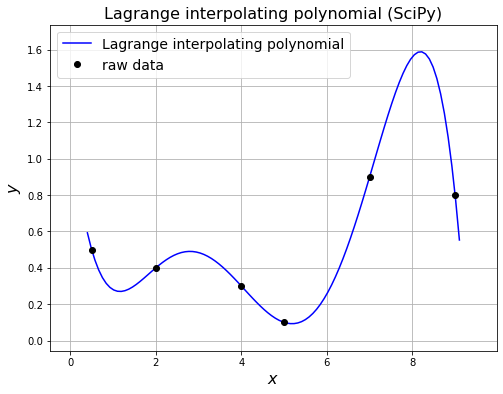

In [88]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.interpolate as si

### Our raw data from earlier - you can also test on our three data point example
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Create the Lagrange polynomial for the given points.
lp = si.lagrange(xi, yi)
# above we executed 'import scipy.interpolate as si'
# and so this line is calling the 'lagrange' function from the 
# 'interpolate' sub-package within scipy.

# Evaluate this function at a high resolution (100 points here) so that 
# we get a smooth well-resolved line when we plot our polynomial
x = np.linspace(0.4, 9.1, 100)

# set up the figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# actually plot (x,y)=(x,lp(x)) on the axes with the label ax1
ax1.plot(x, lp(x), 'b', label='Lagrange interpolating polynomial')

# Overlay raw data on the same axes
plot_raw_data(xi, yi, ax1)
ax1.set_title('Lagrange interpolating polynomial (SciPy)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);

## IV.5 Polynominal Error

Lagrange Interpolation is based on the Lagrange Polynominal, which is a polynominal function. Because of that, Lagrange Interpolation will have errors when interpolating something which is not a polynominal, such as a trigonometric or logarithmic function like $sin$ or $exp$. However, many natural phenomena are actually non polynominal, especially quantities under positive and negative feedback. 

The error when using Lagrange Interpolation to interpolate a non polynominal function can be proven to be proportional to:

1. The distance of the point from any of the data points. 

The Lagrange polynominal is generated using the data points, i.e. xi and yi. While we are certain that the polynominal must pass through these data points, we are less certain what the shape of the polynominal is when the function is away from the points. The further away we are from the data points, the less certain we are about the shape of the function, and thus less certain about the values we get from observing the function. 

2. The $(N+1)th$ derivative of that function evaluated at some location within the bounds of the data

Basically, if the function is having lots of bends and curves in order to pass through the points, then the more likely that there will be errors. 

Check out Lagrange Remainder Theorem for curiosity!

### <span style="color:blue">Exercise 1.1: The Lagrange basis polynomials evaluated at the data locations </span>

For a given $i$, what value does $\ell_i(x_j)$ takes for every value of $j$ (i.e. for each of the data points). <span style="color:green">Hint: Look again at the definition of basis polynomials.</span>

What is the mathematical name for the function $\ell_i(x)$

### <span style="color:blue">Exercise 1.2: Picewise-linear Lagrange interpolant </span>

What are the Lagrange basis polynomials when $N=1$?

Evaluate by *pen and paper* the linear approximation $L_1(x)$ (i.e. the Lagrange polynomial of degree 1) which passes through the two points $(0.0,0.1),(1.0,0.9)$.

Notice that this method is just a glorified approach to obtain the equation of a line you are familar with: $y=mx+c$.

### <span style="color:blue">Exercise 1.3: Approximating a function </span>

Sample the function $y(x)=x^3$ at the points $x=(1,2,3)$.  

Write your own Python function to construct the Lagrange polynomials $L_0$ (the constant interpolant going through the $x=2$ data point only), $L_1$ (the linear interpolant going through the $x=1$ and $x=3$ points) and $L_2$ (the quadratic interpolant going through all three points). Plot the resulting polynomials along with the error compared to the original exact function.

**Tip**: Using the function [fill_between](http://matplotlib.org/examples/pylab_examples/fill_between_demo.html) provides a nice way of illustrating the difference between graphs.

# V. Newton Polynominal

## V.1 Recursive Form and Divided Difference Notation

Similar to Lagrange polynominal, you could also think of the Newton Polynominal as another way to write your polynominal so that it is easier to be interpolated.
Calculating the Newton Polynominal will yield the same polynominal as the Lagrange Polynominal since the Polynominal with the smallest degree to pass through each data point is unique. In essence, you could think of the Newton Polynominal as another way to arrive at the same polynominal that Lagrange polynominal would arrive at, that may be arguably easier to implement than the Lagrange polynominal.  

Our data point can be written as below, where $(x_0,y_0)$ is used to represent a data point at the beginning,$(x_i,y_i)$ is used to represent a data point in the middle, $(x_N,y_N)$ is used to represent a data point at the end. 

$$(x_0,y_0), \ldots (x_i,y_i), \ldots(x_N,y_N)$$

The Newton Polynominal of a certain degree has the following form

$$ P_N(x) = a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + \cdots + (x-x_0)(x-x_1)\ldots(x-x_N)a_N,$$

We use $P(x)$ to represent our Newton Polynominal and we add a subscript $N$ to denote that it is a Newton Polynominal of $N$ degrees. 

To obtain our Newton Polynominal, we need to find $a_0, a_1, \ldots, a_N$. $a_0, a_1, \ldots, a_N$ are our $N+1$ free parameters we need to find using the data points we have we have in the given data.

<span style="color:red;"> Thus, we basically need to find $a_0, a_1, \ldots, a_N$</span>

Efficient derivation of an algorithm to compute the Newton polynomial follows from noticing that we can write this polynomial in a <a href="https://en.wikipedia.org/wiki/Recursion_(computer_science)">*recursive form*</a>.  

Consider for example a case with $N=3$:


\begin{align}
P_3(x) &= a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + (x-x_0)(x-x_1)(x-x_2)a_3\\[5pt]
&= a_0 +(x-x_0)[a_1 + (x-x_1)[a_2 + (x-x_2)a_3]].
\end{align}


Notice that substituting in the $x_i$, so 1st $x_0$, then $x_1$, then $x_2$, $\ldots$, $x_N$ values leads to a set of equations where we can easily evaluate the unknowns $a_0, a_1, \ldots$ using 'back (or forward) substitution' (we'll see what this means in the example that follows, and we will also return to this idea in Lecture 5/6).  

We'll see an example of this now with our $P_3(x)$


$$ P_3(x)= a_0 +(x-x_0)[a_1 + (x-x_1)[a_2 + (x-x_2)a_3]]$$


1. Substitute $x=x_0$: We have $a_0 = P_3(x_0)$, and we know that our interpolant $P_3(x)$ evaluated at $x_0$ must return $y_0$. Hence, 

$$a_0 = y_0.$$


2. Now substitute $x=x_1$: We have $P_3(x_1) = a_0 +(x_1-x_0)a_1 = y_0 +(x_1-x_0)a_1 $, the LHS of this is $y_1$, and we know everything on the RHS as we have already calculated $a_0 = y_0$. We can thus trivially rearrange to yield

$$ a_1 = \frac{(y_1 - y_0)}{(x_1-x_0)}.$$

I also notice that 

$$ a_1 = \frac{(y_1 - a_0)}{(x_1-x_0)}.$$


3. Substituting $x=x_2$ yields 


\begin{align*}
& y_2 = P_3(x_2) = a_0 +(x_2-x_0)[a_1 + (x_2-x_1)a_2] = y_0 + (x_2-x_0)\left[ \frac{(y_1 - y_0)}{(x_1-x_0)} + (x_2-x_1)a_2\right]\\[5pt]
&\implies a_2 = \frac{ \frac{(y_2 - y_0)}{(x_2-x_0)} - \frac{(y_1 - y_0)}{(x_1-x_0)}}{x_2-x_1}.
\end{align*}

$$a_2 = \frac{ \frac{(y_2 - y_0)}{(x_2-x_0)} - a_1}{x_2-x_1}$$


4. And so on ...

To define an algorithm for this method in general let's first introducing the following [*divided difference*](https://en.wikipedia.org/wiki/Divided_differences) notation

\begin{alignat*}{2}
\Delta y_i &= \frac{y_i-y_0}{x_i-x_0},\;\;    && i=1,2,\ldots, N,\\[10pt]
\Delta^2 y_i &= \frac{\Delta y_i-\Delta y_1}{x_i-x_1},\;\;    && i=2, 3,\ldots, N,\\[10pt]
&\vdots\\[5pt]
\Delta^N y_N &= \frac{\Delta^{N-1} y_N-\Delta^{N-1} y_{N-1}}{x_N-x_{N-1}}.
\end{alignat*}


With a bit of thought we can hopefully see from the above example that the coefficients of the interpolating polynomial in the general case are given by


$$a_0=y_0,\;\;\;\;\; a_1 = \Delta y_1, \;\;\;\;\; a_2 = \Delta^2 y_2, \;\;\;\;\; \ldots \;\;\;\;\; a_N = \Delta^N y_N.$$

## V. 2 Code Implementation of V.  1

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as si
%matplotlib inline

# consider the above example data again
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])


def calculate_newton_poly_coeffs(xi, yi):
    """ Evaluate the coefficients a_i recursively using Newton's method
    """
    
    # initialise the array 'a' with yi, but take a copy to ensure we don't
    # overwrite our yi data!
    a = yi.copy()

    # we have N+1 data points, and so
    N = len(a) - 1

    # for each k, we compute Δ^k y_i from the a_i = Δ^(k-1) y_i of the previous iteration:
    ##Work through the for loop and write everything down
    ##After you have finished the entire looping
    ##Compare and see that the equation below actually works to produce the desired result
    
    for k in range(1, N+1):
        # but only for i>=k
        for i in range(k, N+1):
            a[i] = (a[i] - a[k-1])/(xi[i]-xi[k-1])

    return a


# Given the coefficients a, and the data locations xi,
# define a function to evaluate the Newton polynomial
# at locations given in the array x.
# NB. this is just an evaluation of the P_n(x) = ... formula
# given at the start of this section.

def eval_newton_poly(a, xi, x):
    """ Function to evaluate the Newton polynomial
    at x, given the data point xi and the polynomial coeffs a
    """
    N = len(xi) - 1  # polynomial degree
    # recursively build up polynomial evaluated at x
    P = a[N] 
    for k in range(1, N+1):
        P = a[N-k] + (x - xi[N-k])*P
    return P

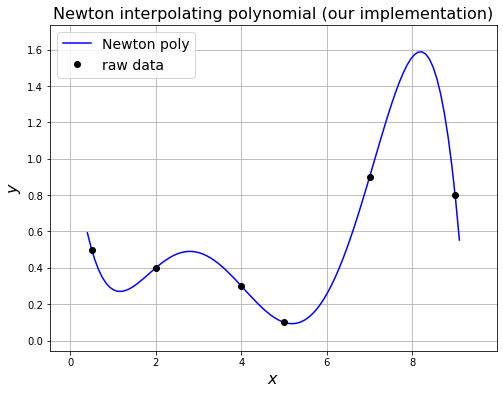

In [9]:
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# add a small margin 
ax1.margins(0.1)

# Evaluate the coefficients of the Newton polynomial
a = calculate_newton_poly_coeffs(xi, yi)
# Evaluate the polynomial at high resolution and plot
x = np.linspace(0.4, 9.1, 100)
ax1.plot(x, eval_newton_poly(a, xi, x), 'b', label='Newton poly')

# Overlay raw data
## Remember that we are going to reuse this?
## Run the cell from above :)
plot_raw_data(xi, yi, ax1)
ax1.set_title('Newton interpolating polynomial (our implementation)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);

### <span style="color:blue">Exercise 1.4: Squared error calculation</span>

As described in the docs ([numpy.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)), least squares fitting minimises the sum of the squares of the differences between the data provided and the polynomial approximation, i.e. it minimises the expression

$$E = \sum_{i=0}^{N} (P(x_i) - y_i)^2,$$

where $P(x_i)$ is the value of the polynomial function that has been fit to the data evaluated at point $x_i$, and $y_i$ is the $i^{th}$ data value.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Linear_least_squares_example2.svg" style="width: 300px">

*(Wikipedia: https://en.wikipedia.org/wiki/Linear_least_squares) We're computing the sum of the squares of the distances indicated in green.*



Write a Python function that evaluates the squared error, $E$, and use this function to evaluate the error for each of the polynomials calculated above.

**Tip**: Try to pass the function *p* in as an argument to your error calculation function. One of the great features of Python is that it is easy to pass in functions as arguments.

Why is the square of the difference used? 

### <span style="color:blue">Exercise 1.5: Degree of approximation </span>

Extend the example above by fitting and plotting polynomials of increasing degree past cubic. At what *degree* does the resulting polynomial approximation equate to the Lagrange interpolant?

Why does this make sense? 

**Hint**: think about the number of free parameters in a polynomial, and the amount of data you have.

# VI. Extrapolation


*Interpolation* by definition is used to estimate $y$ for values of $x$ within the bounds of the available data (here $[0.5,9]$) with some confidence. *Extrapolation* on the other hand is the process of estimating (e.g. using the interpolating function) $y$ *outside* the bounds of the available data. However, extrapolation requires a great deal of care as it will become increasingly inaccurate as you go further out of bounds.

### <span style="color:blue">Exercise 1.6: Extrapolation </span>

Recreate the plots in the example above for different degrees of polynomial, setting the x-range from -2.0 to 11.0. What do you notice about extrapolation when you use higher degree polynomials.

### <span style="color:blue">Exercise 1.7: Submarine landslide size in the North Atlantic </span>

Open the data file [Length-Width.dat](data/Length-Width.dat) (located in the data directory) giving the lengths and widths of submarine landslides in the North Atlantic basin [from [Huhnerbach & Masson, 2004](http://www.sciencedirect.com/science/article/pii/S0025322704002774), Fig. 7].  Fit a linear best fit line using polyfit and try to recreate the image below.

**Hint**: You will need to take the log of the data before fitting a line to it. </span>

!["Cloud of point data for submarine landslide widths and depths in the North Atlantic, and a correspondong best (linear) curve fit."](images/Width-Length.png)


Reference: [V. Huhnerbach, D.G. Masson, Landslides in the North Atlantic and its adjacent seas:
an analysis of their morphology, setting and behaviour, Marine Geology 213 (2004) 343 – 362.](http://www.sciencedirect.com/science/article/pii/S0025322704002774)